In [39]:
import pandas as pd
from math import sin, cos, sqrt, atan2, radians

df_s18 = pd.read_csv('./data_01/stacje_2018.csv')
#df_s19 = pd.read_csv('./data_01/stacje_2019.csv')
#df_w17 = pd.read_csv('./data_01/wyp_2017.csv')
df_w18 = pd.read_csv('./data_01/wyp_2018.csv')

In [3]:
df_w18.sample(5)

,bike_num,start_time,end_time,departure,return,duration_sec
86032,58620,2018-06-28 06:43:25,2018-06-28 06:53:25,Katowice Rynek,Koszutka – Plac Gwarków,600
149256,58531,2018-08-29 16:31:39,2018-08-29 17:19:12,Plac Wolności,Plac Wolności,2853
171616,58581,2018-10-01 17:15:32,2018-10-01 17:40:18,Katowice Rynek,Al. Księcia Henryka Pobożnego,1486
33597,58548,2018-05-06 13:01:13,2018-05-06 13:20:11,Katowice Rynek,Silesia City Center,1138
140461,58598,2018-08-20 17:35:37,2018-08-20 17:49:01,Al. Bolesława Krzywoustego,ING Sokolska,804


In [4]:
df_w18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193328 entries, 0 to 193327
Data columns (total 6 columns):
bike_num        193328 non-null int64
start_time      193328 non-null object
end_time        193328 non-null object
departure       193328 non-null object
return          193328 non-null object
duration_sec    193328 non-null int64
dtypes: int64(2), object(4)
memory usage: 8.8+ MB


In [5]:
df_s18.sample(5)

,name,id,lat,lon,capacity
31,Giszowiec - Plac Pod Lipami,5864,50.221926,19.064727,12
27,Piotrowice V L.O.,5892,50.214638,18.990066,12
13,Murapol Chorzowska,5881,50.267405,19.013105,12
26,Zadole Kościół,5891,50.219287,18.976253,12
39,Kostuchna – Szarych Szeregów,5855,50.193605,18.990702,12


In [6]:
df_s18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
name        54 non-null object
id          54 non-null int64
lat         54 non-null float64
lon         54 non-null float64
capacity    54 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.2+ KB


TODO:
    + odległość stacji w km: departure - return
    + średnia prędkość
    +/- oznaczenie kursów które zaczynały się i kończyły w tym samym miejscu (gdy dystans =0)
    - dystans najpopulariejszego roweru
    
    

# Przygotowanie danych

## Złączenie danych - informacje o lokalizacji stacji

In [41]:
df_w18 = pd.merge(df_w18, df_s18[['name','lat', 'lon']], left_on='departure', right_on='name', how='left')

In [8]:
df_w18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193328 entries, 0 to 193327
Data columns (total 9 columns):
bike_num        193328 non-null int64
start_time      193328 non-null object
end_time        193328 non-null object
departure       193328 non-null object
return          193328 non-null object
duration_sec    193328 non-null int64
name            193328 non-null object
lat             193328 non-null float64
lon             193328 non-null float64
dtypes: float64(2), int64(2), object(5)
memory usage: 14.7+ MB


In [42]:
df_w18.rename(columns={'lon': 'd_lon', 'lat': 'd_lat'}, inplace=True)

In [43]:
del df_w18['name']

In [44]:
df_w18 = pd.merge(df_w18, df_s18[['name','lat', 'lon']], left_on='return', right_on='name', how='left')

In [45]:
df_w18.head(3)

,bike_num,start_time,end_time,departure,return,duration_sec,d_lat,d_lon,name,lat,lon
0,58388,2018-04-01 00:16:10,2018-04-01 00:20:17,Murapol Mariacka,KTBS – Krasińskiego 14,247,50.257215,19.028645,KTBS – Krasińskiego 14,50.255163,19.037121
1,58745,2018-04-01 00:10:28,2018-04-01 00:20:28,Murapol Mariacka,KTBS – Krasińskiego 14,600,50.257215,19.028645,KTBS – Krasińskiego 14,50.255163,19.037121
2,58547,2018-04-01 10:34:09,2018-04-01 10:41:38,KTBS – Krasińskiego 14,Katowice Rynek,449,50.255163,19.037121,Katowice Rynek,50.258697,19.021618


In [46]:
df_w18.rename(columns={'lon': 'r_lon', 'lat': 'r_lat'}, inplace=True)

In [47]:
del df_w18['name']

In [48]:
df_w18.head(3)

,bike_num,start_time,end_time,departure,return,duration_sec,d_lat,d_lon,r_lat,r_lon
0,58388,2018-04-01 00:16:10,2018-04-01 00:20:17,Murapol Mariacka,KTBS – Krasińskiego 14,247,50.257215,19.028645,50.255163,19.037121
1,58745,2018-04-01 00:10:28,2018-04-01 00:20:28,Murapol Mariacka,KTBS – Krasińskiego 14,600,50.257215,19.028645,50.255163,19.037121
2,58547,2018-04-01 10:34:09,2018-04-01 10:41:38,KTBS – Krasińskiego 14,Katowice Rynek,449,50.255163,19.037121,50.258697,19.021618


In [16]:
df_w18.to_csv('./data_01/output.csv')

## Odległości przejazdu

In [52]:
def get_distance(d_lat : float,d_lon : float, r_lat : float, r_lon : float):
    # approximate radius of earth in km
    R = 6373.0

    #d_lat = radians(50.200546)
    #d_lon = radians(18.991386)
    #r_lat = radians(50.193605)
    #r_lon = radians(18.990702)
    
    d_lat = radians(d_lat)
    d_lon = radians(d_lon)
    r_lat = radians(r_lat)
    r_lon = radians(r_lon)

    dlon = r_lon - d_lon
    dlat = r_lat - d_lat
    
    if dlon != 0 and dlat != 0: 

        a = sin(dlat / 2)**2 + cos(d_lat) * cos(r_lat) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

    #distance = R * c
    
        return R*c
    else: 
        return 0

%time get_distance(50.200546,18.991386,50.193605,18.990702)

#print("Result:", distance)
#print("Should be:", 278.546, "km")

Wall time: 0 ns


0.7735809319926391

In [18]:
df_w18['distance'] = 0.0
#df = df.astype({"a": float64})

In [19]:
df_w18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193328 entries, 0 to 193327
Data columns (total 11 columns):
bike_num        193328 non-null int64
start_time      193328 non-null object
end_time        193328 non-null object
departure       193328 non-null object
return          193328 non-null object
duration_sec    193328 non-null int64
d_lat           193328 non-null float64
d_lon           193328 non-null float64
r_lat           193328 non-null float64
r_lon           193328 non-null float64
distance        193328 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 17.7+ MB


## Wyliczenie długości trasy
v1: bardzo wolno ~20 sek

In [58]:
def calc_dist():
    for index, row in df_w18.iterrows():
        a = df_w18['d_lat'].values[index]
        b = df_w18['d_lon'].values[index]
        c = df_w18['r_lat'].values[index]
        d = df_w18['r_lon'].values[index]
    
        df_w18['distance'].values[index] = get_distance(a,b,c,d)
    
    
%time calc_dist()    

Wall time: 17.8 s


v2: Po opymalizacji z wykorzystaniem `apply` i `lambda` ~10 sek

In [57]:
%time df_w18['distance'] = df_w18.apply(lambda x: get_distance(x.d_lat,x.d_lon,x.r_lat,x.r_lon), axis=1)

Wall time: 9.16 s


In [22]:
type(df_w18['d_lat'])

pandas.core.series.Series

In [54]:
df_w18.head(3)

,bike_num,start_time,end_time,departure,return,duration_sec,d_lat,d_lon,r_lat,r_lon,distance
0,58388,2018-04-01 00:16:10,2018-04-01 00:20:17,Murapol Mariacka,KTBS – Krasińskiego 14,247,50.257215,19.028645,50.255163,19.037121,0.644515
1,58745,2018-04-01 00:10:28,2018-04-01 00:20:28,Murapol Mariacka,KTBS – Krasińskiego 14,600,50.257215,19.028645,50.255163,19.037121,0.644515
2,58547,2018-04-01 10:34:09,2018-04-01 10:41:38,KTBS – Krasińskiego 14,Katowice Rynek,449,50.255163,19.037121,50.258697,19.021618,1.170422


In [59]:
df_w18.to_csv('./data_01/output.csv')

In [25]:
# https://stackoverflow.com/questions/44282210/passing-column-values-into-lambda-function-in-pandas


In [26]:
df_w18['speed'] = df_w18['distance']/(df_w18['duration_sec']/3600)

In [27]:
df_w18.head(3)

,bike_num,start_time,end_time,departure,return,duration_sec,d_lat,d_lon,r_lat,r_lon,distance,speed
0,58388,2018-04-01 00:16:10,2018-04-01 00:20:17,Murapol Mariacka,KTBS – Krasińskiego 14,247,50.257215,19.028645,50.255163,19.037121,0.644515,9.393742
1,58745,2018-04-01 00:10:28,2018-04-01 00:20:28,Murapol Mariacka,KTBS – Krasińskiego 14,600,50.257215,19.028645,50.255163,19.037121,0.644515,3.867090
2,58547,2018-04-01 10:34:09,2018-04-01 10:41:38,KTBS – Krasińskiego 14,Katowice Rynek,449,50.255163,19.037121,50.258697,19.021618,1.170422,9.384228


In [28]:
df_w18['speed'].describe()

count    1.933170e+05
mean              inf
std               NaN
min      0.000000e+00
25%      0.000000e+00
50%      5.530769e+00
75%      8.547591e+00
max               inf
Name: speed, dtype: float64

In [29]:
df_w18['speed'].max()

inf

# Wyliczenie danych

In [31]:
df = pd.read_csv('./data_01/output.csv')

In [32]:
df.sample(5)

,Unnamed: 0,bike_num,start_time,end_time,departure,return,duration_sec,d_lat,d_lon,r_lat,r_lon,distance
20393,20393,58808,2018-04-22 17:42:23,2018-04-22 17:44:40,Katowice Rynek,Katowice Rynek,137,50.258697,19.021618,50.258697,19.021618,0.000000
116580,116580,58804,2018-07-30 18:08:24,2018-07-30 18:33:36,Silesia City Center,Katowice Rynek,1512,50.269575,19.003708,50.258697,19.021618,1.756702
34219,34219,58426,2018-05-06 17:18:12,2018-05-06 18:35:06,Al. Księżnej Jadwigi Śląskiej,Al. Księcia Henryka Pobożnego,4614,50.284196,18.967890,50.280125,18.973740,0.614698
191449,191449,58532,2018-11-26 15:17:17,2018-11-26 15:18:21,Plac Wolności,Plac Wolności,64,50.259690,19.014510,50.259690,19.014510,0.000000
56077,56077,58720,2018-05-31 14:47:52,2018-05-31 14:53:16,Politechnika Śląska,Murapol Mariacka,324,50.255403,19.032292,50.257215,19.028645,0.328451


In [65]:
def calc_avg_speed(a,b):
    if a == 0 or b == 0:
        return -1
    else:
        return a /(b/3600)

#calc_avg_speed(1.756702,1512)    

%time df['avg_speed'] = df.apply(lambda x: calc_avg_speed(x.distance,x.duration_sec), axis=1)

Wall time: 5.08 s


In [66]:
df.sample(5)

,Unnamed: 0,bike_num,start_time,end_time,departure,return,duration_sec,d_lat,d_lon,r_lat,r_lon,distance,avg_speed
141045,141045,58855,2018-08-21 07:42:14,2018-08-21 07:44:37,Murapol Mariacka,Katowice Rynek,143,50.257215,19.028645,50.258697,19.021618,0.526179,13.246471
23679,23679,58775,2018-04-25 22:26:42,2018-04-25 22:37:28,Ligota Dworzec PKP,Kokociniec S.P nr 67,646,50.226179,18.975212,50.234985,18.959488,1.487056,8.287001
108432,108432,58801,2018-07-22 18:23:00,2018-07-22 18:23:37,KTBS – Saint Etienne 1,KTBS – Saint Etienne 1,37,50.261186,19.056013,50.261186,19.056013,0.000000,-1.000000
182312,182312,58833,2018-10-22 14:19:59,2018-10-22 14:27:30,Katowice Rynek,Politechnika Śląska,451,50.258697,19.021618,50.255403,19.032292,0.842823,6.727631
39172,39172,58743,2018-05-12 11:38:38,2018-05-12 11:48:09,Ligota Dworzec PKP,Ligota Wczasowa,571,50.226179,18.975212,50.218784,18.968023,0.968636,6.106986


Przeglad danych: najszybszy rower jechał z prędkością 8000 km/h?!

In [67]:
df['avg_speed'].describe()

count    193328.000000
mean          5.306863
std          34.540931
min          -1.000000
25%          -1.000000
50%           5.530259
75%           8.547194
max        8137.436931
Name: avg_speed, dtype: float64

In [80]:
df[df.avg_speed < 5 ]

,Unnamed: 0,bike_num,start_time,end_time,departure,return,duration_sec,d_lat,d_lon,r_lat,r_lon,distance,avg_speed
1,1,58745,2018-04-01 00:10:28,2018-04-01 00:20:28,Murapol Mariacka,KTBS – Krasińskiego 14,600,50.257215,19.028645,50.255163,19.037121,0.644515,3.867090
9,9,58806,2018-04-01 12:40:30,2018-04-01 12:57:01,Dolina 3-ch Stawów,Dolina 3-ch Stawów,991,50.233217,19.027812,50.233217,19.027812,0.000000,-1.000000
10,10,58686,2018-04-01 12:38:55,2018-04-01 13:15:14,Ligota Wczasowa,Piotrowice V L.O.,2179,50.218784,18.968023,50.214638,18.990066,1.635239,2.701634
11,11,58460,2018-04-01 12:48:22,2018-04-01 13:19:26,Bogucice Szpital,Murapol Chorzowska,1864,50.268774,19.038691,50.267405,19.013105,1.825441,3.525530
12,12,58675,2018-04-01 12:16:00,2018-04-01 13:19:34,Katowice Rynek,Murapol Chorzowska,3814,50.258697,19.021618,50.267405,19.013105,1.142214,1.078126
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193309,193309,58744,2018-12-16 13:33:32,2018-12-16 13:38:12,Murapol Mariacka,Murapol Mariacka,280,50.257215,19.028645,50.257215,19.028645,0.000000,-1.000000
193310,193310,58545,2018-12-16 13:38:59,2018-12-16 13:40:04,Murapol Mariacka,Murapol Mariacka,65,50.257215,19.028645,50.257215,19.028645,0.000000,-1.000000
193311,193311,58659,2018-12-16 12:47:39,2018-12-16 13:41:31,Katowice Rynek,Murapol Mariacka,3232,50.258697,19.021618,50.257215,19.028645,0.526179,0.586091
193312,193312,58659,2018-12-16 13:43:33,2018-12-16 13:47:13,Murapol Mariacka,Murapol Mariacka,220,50.257215,19.028645,50.257215,19.028645,0.000000,-1.000000


In [72]:
df.sort_values('avg_speed')

,Unnamed: 0,bike_num,start_time,end_time,departure,return,duration_sec,d_lat,d_lon,r_lat,r_lon,distance,avg_speed
96663,96663,58409,2018-07-08 16:07:12,2018-07-08 18:02:09,Al. Bolesława Krzywoustego,Al. Bolesława Krzywoustego,6897,50.275061,18.980549,50.275061,18.980549,0.000000,-1.000000
162379,162379,58385,2018-09-15 19:13:08,2018-09-15 19:53:20,Załęże Skwer S. Barei,Załęże Skwer S. Barei,2412,50.263076,19.004620,50.263076,19.004620,0.000000,-1.000000
54321,54321,58780,2018-05-29 18:12:22,2018-05-29 18:14:36,Katowice Rynek,Katowice Rynek,134,50.258697,19.021618,50.258697,19.021618,0.000000,-1.000000
119858,119858,58765,2018-08-02 17:00:50,2018-08-02 17:27:57,Al. Bolesława Krzywoustego,Al. Bolesława Krzywoustego,1627,50.275061,18.980549,50.275061,18.980549,0.000000,-1.000000
54323,54323,58788,2018-05-29 18:16:38,2018-05-29 18:17:59,Al. Księcia Henryka Pobożnego,Al. Księcia Henryka Pobożnego,81,50.280125,18.973740,50.280125,18.973740,0.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133748,133748,58418,2018-08-14 20:38:00,2018-08-14 20:38:11,Murapol Chorzowska,Podlesie – Stary Most,11,50.267405,19.013105,50.174393,18.970738,10.776104,3526.724813
160713,160713,58490,2018-09-12 20:27:59,2018-09-12 20:28:00,KTBS – Krasińskiego 14,Katowice Rynek,1,50.255163,19.037121,50.258697,19.021618,1.170422,4213.518186
80080,80080,58891,2018-06-20 16:47:14,2018-06-20 16:47:20,KTBS – Krasińskiego 14,Kostuchna – Rondo Rostworowskiego,6,50.255163,19.037121,50.200024,18.977245,7.467815,4480.689157
133730,133730,58412,2018-08-14 20:30:52,2018-08-14 20:31:00,Silesia City Center,Podlesie – Stary Most,8,50.269575,19.003708,50.174393,18.970738,10.843979,4879.790686


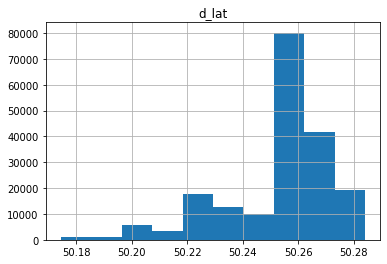

In [93]:
import matplotlib.pyplot as plt


df.hist(column='d_lat');

In [68]:
df.to_csv('./data_01/output2.csv')